In [106]:
import pandas as pd
import numpy as np

#For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Machine learning model
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.tree import plot_tree

In [75]:
df = pd.read_csv("project_data/DDoS.csv")
df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [76]:
# Remove the spaces before column names
df.columns = df.columns.str.strip()

In [77]:
df.loc[:, 'Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

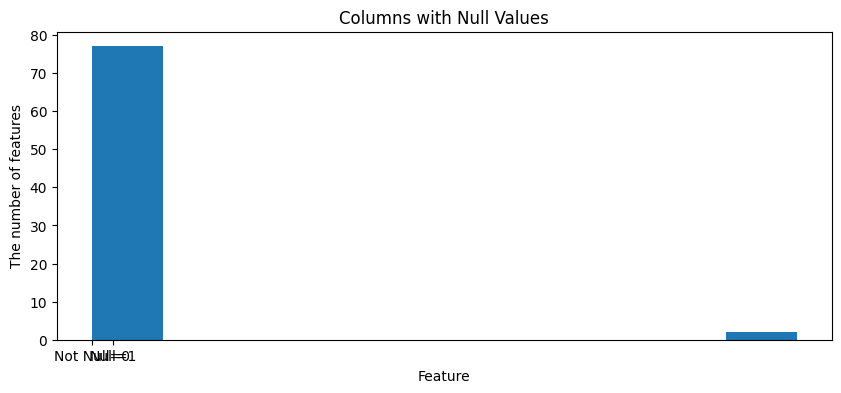

In [78]:
#Checking the null values in the dataset
plt.figure(1, figsize=(10, 4))
plt.hist(df.isna().sum())
#Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

#Show the plot
plt.show()

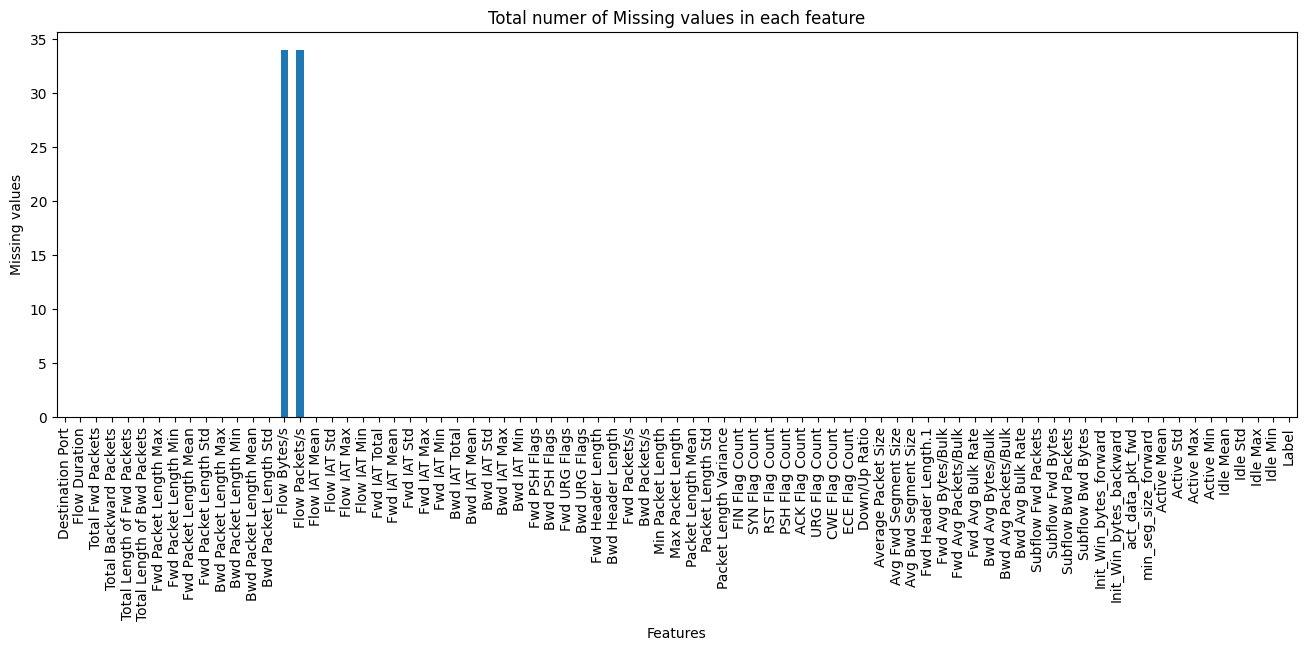

In [79]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel('Features')
    plt.ylabel('Missing values')
    plt.title('Total numer of Missing values in each feature')
    plt.show()

plotMissingValues(df)


In [80]:
#Removing the null values
data_f=df.dropna()

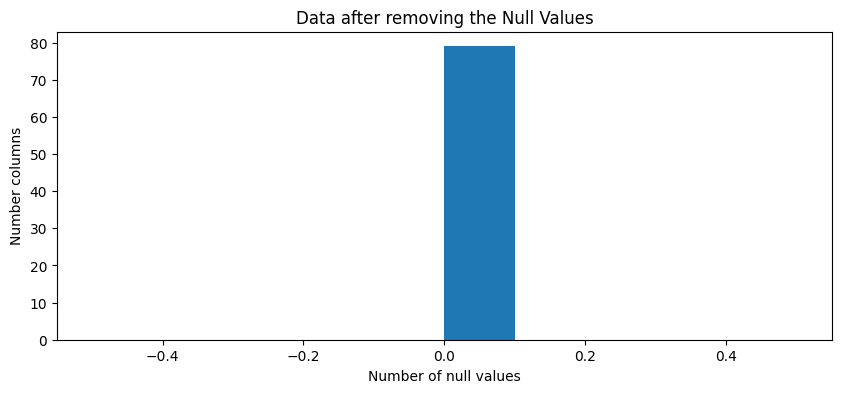

In [81]:
#Checking the null balues in the dataset
plt.figure(1, figsize=(10, 4))
plt.hist(data_f.isna().sum())
#Set the title and axis labels
plt.title('Data after removing the Null Values')
plt.xlabel('Number of null values')
plt.ylabel('Number columns')

#Show the plot
plt.show()

In [82]:
pd.set_option('use_inf_as_na', True) #Treat inf as Nan
null_values=data_f.isnull().sum() #check for NaN values

In [83]:
#To know the data types of the columns
(data_f.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [84]:
#Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS':1})

<ipython-input-84-546b80994223>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS':1})


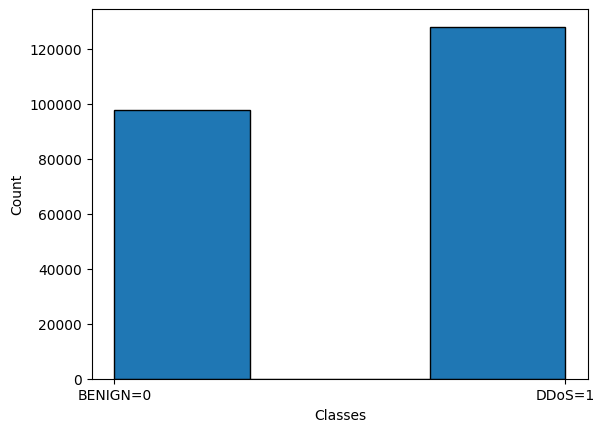

In [85]:
#Print the DataFrame
plt.hist(data_f['Label'], bins=[0,0.3,0.7,1], edgecolor='black')
plt.xticks([0, 1], labels=['BENIGN=0','DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [86]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [87]:
#Convert into numpy array
X1=np.array(data_f).astype(np.float64)
y1=np.array(data_f['Label'])

In [88]:
X = data_f.drop('Label', axis=1) #input
y = data_f['Label'] #target col

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [89]:
print('The traindataset size = ', X_train.shape)
print('The test dataset size = ', X_test.shape)

The traindataset size =  (157997, 78)
The test dataset size =  (67714, 78)


In [90]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

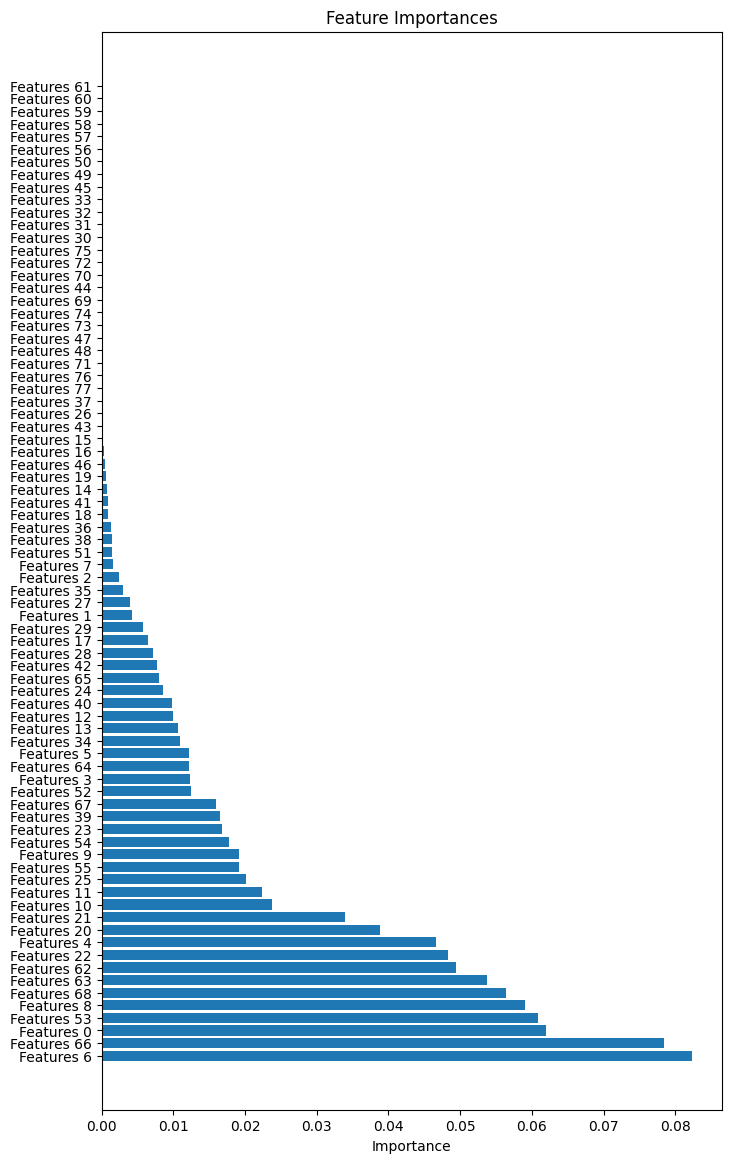

In [91]:
#Getting feature importances from the trained model
importances = rf_model.feature_importances_
#Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
feature_names = [f'Features {i}' for i in indices]

#Plotting feature importances horizontally
plt.figure(figsize=(8,14))
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

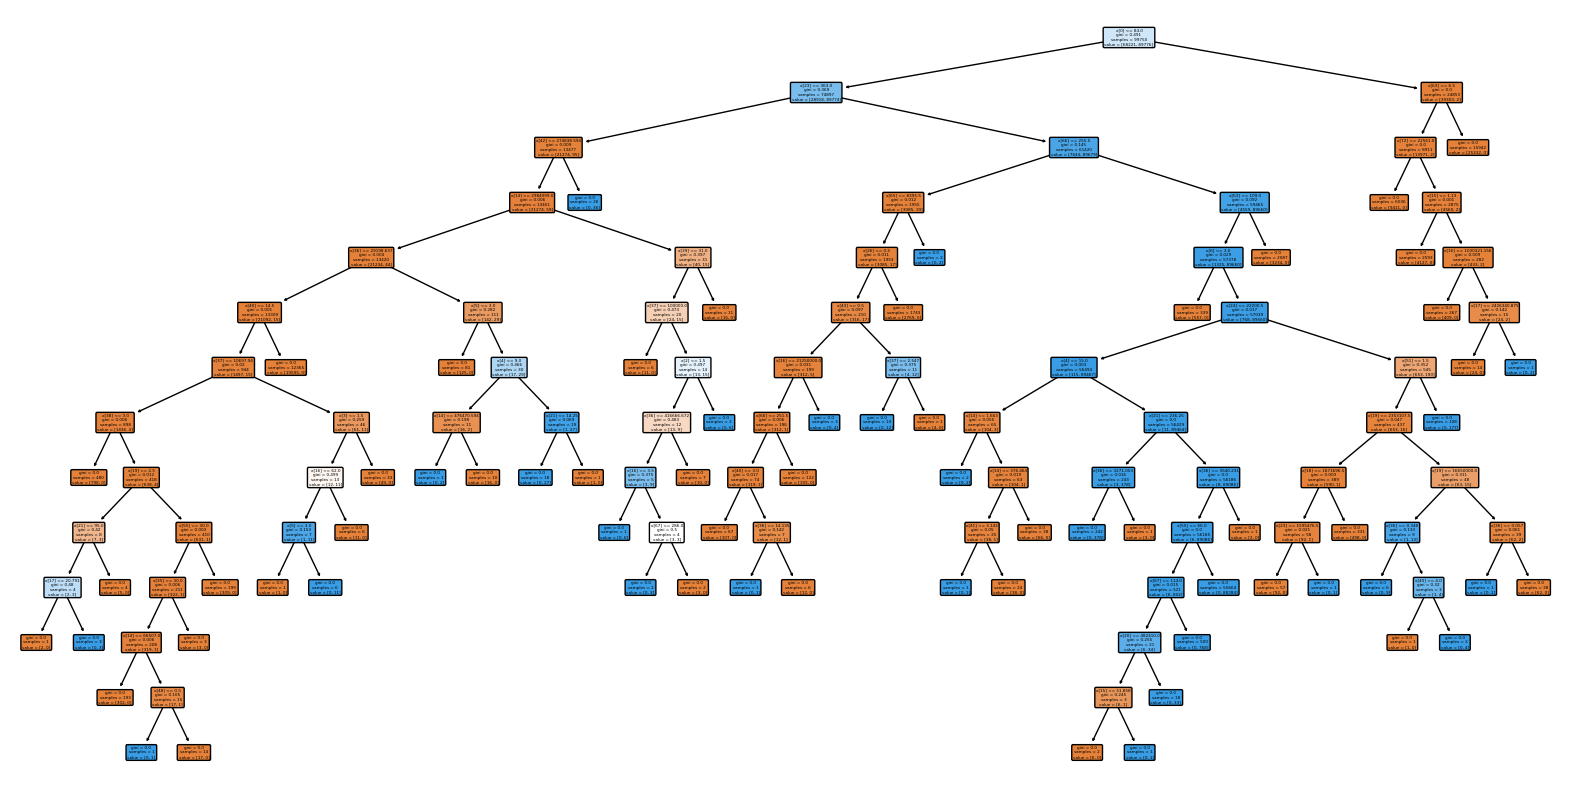

In [97]:
estimator = rf_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

In [107]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [109]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy: .4f}')
print(f'F1 Score: {rf_f1: .4f}')
print(f'Precision: {rf_precision: .4f}')
print(f'Recall: {rf_recall: .4f}')


Random Forest Metrics:
Accuracy:  0.9999
F1 Score:  0.9999
Precision:  1.0000
Recall:  0.9998


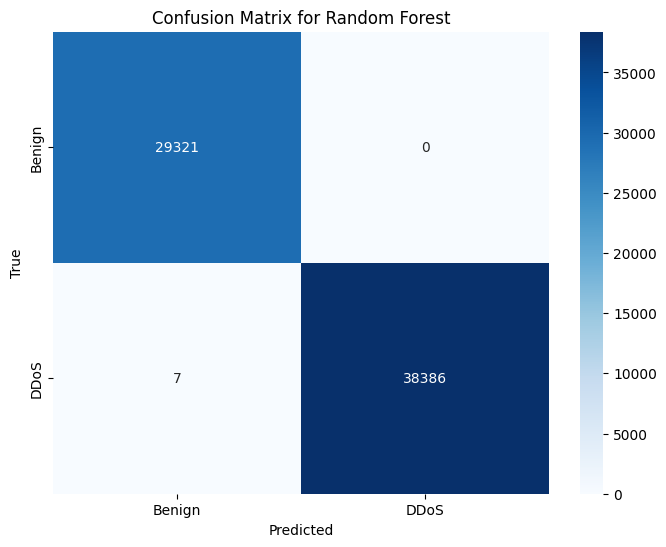

In [110]:
#Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Confusion Matrix for Random Forest')

In [111]:
#Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
#Evalueate LogisticRegression
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

print('\nLogistic Regression:')
print(f'Accuracy: {lr_accuracy: .4f}')
print(f'F1 Score: {lr_f1: .4f}')
print(f'Precision: {lr_precision: .4f}')
print(f'Recall: {lr_recall: .4f}')


Random Forest Metrics:
Accuracy:  0.9401
F1 Score:  0.9493
Precision:  0.9123
Recall:  0.9895


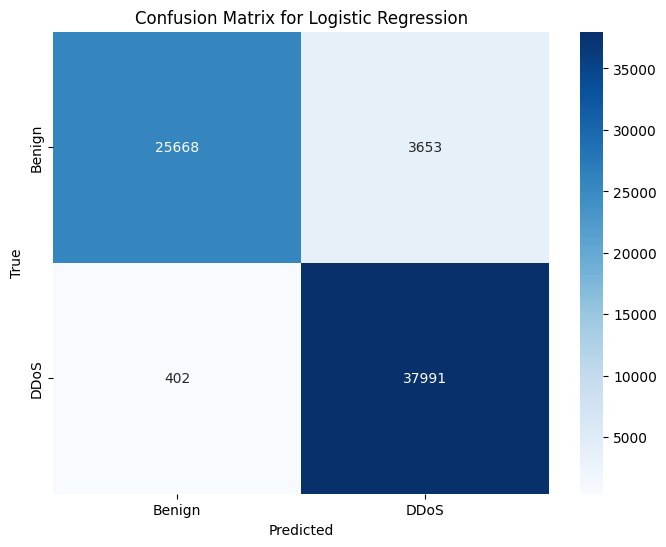

In [113]:
#Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Confusion Matrix for Logistic Regression')

In [114]:
#Logistic Regression
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10 ,random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [115]:
#Evalueate LogisticRegression
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network:')
print(f'Accuracy: {nn_accuracy: .4f}')
print(f'F1 Score: {nn_f1: .4f}')
print(f'Precision: {nn_precision: .4f}')
print(f'Recall: {nn_recall: .4f}')


Neural Network:
Accuracy:  0.9807
F1 Score:  0.9830
Precision:  0.9855
Recall:  0.9804


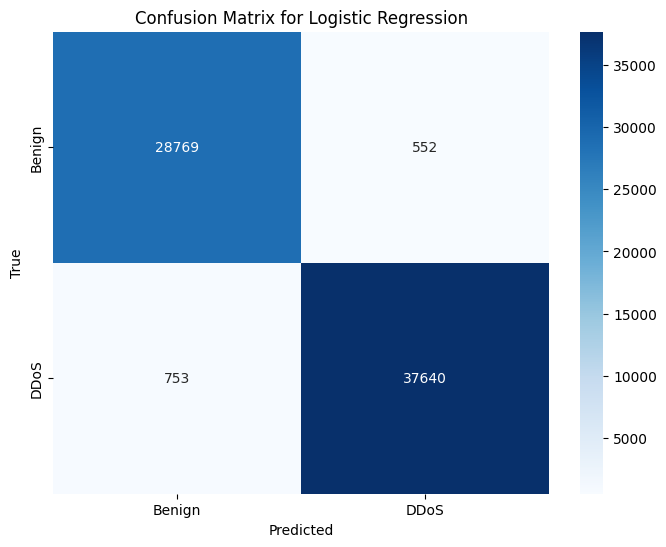

In [116]:
#Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Confusion Matrix for Logistic Regression')

In [125]:
#Model Comparison

rf_proba = rf_model.predict_proba(X_test)

lr_proba = lr_model.predict_proba(X_test)

nn_proba = nn_model.predict_proba(X_test)

In [126]:
#Combine predictions for ROC curve
#Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
fr_auc = auc(rf_fpr, rf_tpr)

#Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

#Calculate ROC curve for Random Forest
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)


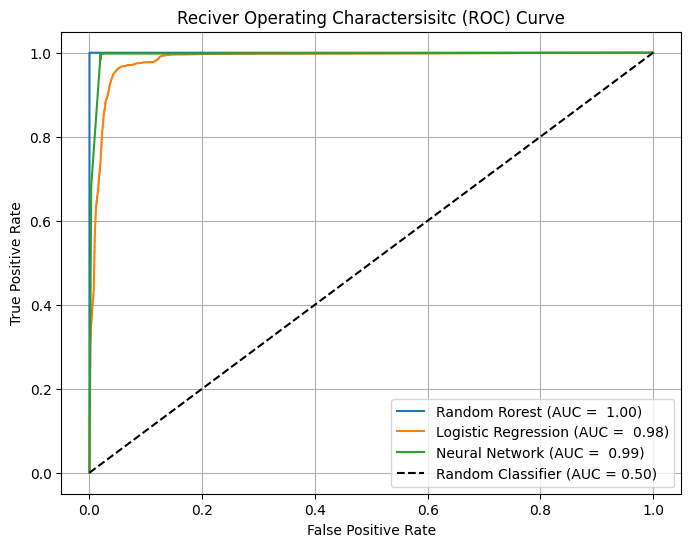

In [130]:
#Plot ROC curves for all models

plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Rorest (AUC = {fr_auc: .2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc: .2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc: .2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciver Operating Charactersisitc (ROC) Curve')
plt.legend()
plt.grid()
plt.show()
